In [1]:
import sys
import os
sys.path.append('/global/u2/c/caditi97/exatrkx-ctd2020')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from utils_robust import *

In [2]:
feature_names = ['x', 'y', 'z', 'cell_count', 'cell_val', 'leta', 'lphi', 'lx', 'ly', 'lz', 'geta', 'gphi']
noise_keeps = ["0", "0.2", "0.4", "0.6", "0.8", "1"]


In [3]:
def get_filter_metrics(noise_keeps,feature_names):
    t_pairs = []
    f_pairs = []
    purity = []
    efficiency = []
    in_noise = []
    total_noise = []
    noise_ratios = []
    
    for noise in noise_keeps:
        hits, truth, emb_model, filter_model = get_data(noise)
        print("-----Getting Neighbors-----")
        neighbors = get_emb_neighbors(hits[feature_names].values, emb_model, 0.4)
        print("#Neighbors = {}".format(len(neighbors)))
        print("-----Getting All Pairs-----")
        all_pairs, all_scores = apply_filter_model(hits, filter_model, neighbors,False)
        print("-----Filtering Pairs-----")
        filter_pairs, filter_scores = apply_filter_model(hits, filter_model, neighbors,True)
        print("-----Getting True Pairs-----")
        all_true_pairs = get_truth_pairs(hits,truth)
        n_pairs = [(pair[0], pair[1]) for pair in filter_pairs]
        t_pairs.append(len(all_pairs))
        f_pairs.append(len(filter_pairs))
        print("-----Getting Total Noise-----")
        t_noise = get_noise_pairs(all_pairs,truth)
        print("-----Getting Noise Above Threshold-----")
        f_noise = get_noise_pairs(filter_pairs,truth)
        total_noise.append(t_noise)
        in_noise.append(f_noise)
        if t_noise == 0:
            n_ratio = 0
        else:
            n_ratio = f_noise/t_noise
        print("Noise Ratio = " + str(n_ratio))
        noise_ratios.append(n_ratio)
        all_t = frozenset(all_true_pairs)
        n_true_f = sum(map(lambda n : n in all_t, n_pairs))
        p = n_true_f/len(filter_pairs)
        e = n_true_f/len(all_true_pairs)
        purity.append(p)
        efficiency.append(e)
        
    fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3,2, figsize=(20,25))
    x = [float(keep) for keep in noise_keeps]
    
    ax1.plot(x, t_pairs)
    ax1.set_title("Total Number of Filtered Pairs")
    ax1.set_xlabel("noise_keep")
    ax2.plot(x, f_pairs)
    ax2.set_title("Filtered Pairs above 0.95 Threshold")
    ax2.set_xlabel("noise_keep")
    
    ax3.plot(x, purity)
    ax3.set_title("Purity")
    ax3.set_xlabel("noise_keep")
    ax4.plot(x, efficiency)
    ax4.set_title("Efficiency")
    ax4.set_xlabel("noise_keep")
    
    noise_ratios.pop(0)
    total_noise.pop(0)
    in_noise.pop(0)
    noise_keepsn = ["0.2", "0.4", "0.6", "0.8", "1"]
    xn = [float(keep) for keep in noise_keepsn]
    ax5.plot(xn, noise_ratios, label='Noise Ratio')
    ax5.set_title("Noise Ratio")
    ax5.set_xlabel("noise_keep")
    plt.legend()
    ax6.plot(xn, in_noise)
    ax6.plot(xn, total_noise, label='Total Noise')
    ax6.set_title("Noise above Threshold")
    ax6.set_xlabel("noise_keep")
    
    
    plt.savefig("filter_metrics.png", bbox_inches='tight')
    plt.tight_layout()
    plt.show()

noise: 0 number of hits: 52482
-----Getting Neighbors-----
#Neighbors = 52482
-----Getting All Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered
   184.66377% neighbors before filter ---#pairs = 9691524
-----Filtering Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered


  1%|          | 73/8187 [00:00<00:11, 721.12it/s]

   10.02517% neighbors after filter ---#pairs = 526141
-----Getting True Pairs-----


  1%|          | 72449/9691524 [00:00<00:13, 724488.96it/s]

-----Getting Total Noise-----


 15%|█▌        | 79861/526141 [00:00<00:00, 798603.15it/s]

-----Getting Noise Above Threshold-----


100%|██████████| 526141/526141 [00:00<00:00, 775302.72it/s]


Noise Ratio = 0
noise: 0.2 number of hits: 55094
-----Getting Neighbors-----
#Neighbors = 55094
-----Getting All Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered
   192.62288% neighbors before filter ---#pairs = 10612365
-----Filtering Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered


  1%|          | 69/8187 [00:00<00:11, 689.18it/s]

   10.49688% neighbors after filter ---#pairs = 578315
-----Getting True Pairs-----


  1%|          | 78427/10612365 [00:00<00:13, 784263.27it/s]

-----Getting Total Noise-----


 14%|█▍        | 79849/578315 [00:00<00:00, 798486.95it/s]

-----Getting Noise Above Threshold-----


100%|██████████| 578315/578315 [00:00<00:00, 790156.30it/s]


Noise Ratio = 0.05667015979714504
noise: 0.4 number of hits: 57699
-----Getting Neighbors-----
#Neighbors = 57699
-----Getting All Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered
   201.86594% neighbors before filter ---#pairs = 11647463
-----Filtering Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered


  1%|          | 69/8187 [00:00<00:11, 681.32it/s]

   11.04492% neighbors after filter ---#pairs = 637281
-----Getting True Pairs-----


  1%|          | 75394/11647463 [00:00<00:15, 753935.33it/s]

-----Getting Total Noise-----


 10%|█         | 65407/637281 [00:00<00:00, 654064.39it/s]

-----Getting Noise Above Threshold-----


100%|██████████| 637281/637281 [00:00<00:00, 794127.87it/s]


Noise Ratio = 0.056825734414462314
noise: 0.6 number of hits: 60314
-----Getting Neighbors-----
#Neighbors = 60314
-----Getting All Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered
   211.41821% neighbors before filter ---#pairs = 12751478
-----Filtering Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered


  1%|          | 59/8187 [00:00<00:13, 587.93it/s]

   11.64357% neighbors after filter ---#pairs = 702270
-----Getting True Pairs-----


  1%|          | 76076/12751478 [00:00<00:16, 760749.84it/s]

-----Getting Total Noise-----


 23%|██▎       | 158294/702270 [00:00<00:00, 793564.38it/s]

-----Getting Noise Above Threshold-----


100%|██████████| 702270/702270 [00:00<00:00, 827785.47it/s]


Noise Ratio = 0.05756192220349679
noise: 0.8 number of hits: 62859
-----Getting Neighbors-----
#Neighbors = 62859
-----Getting All Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered
   221.11982% neighbors before filter ---#pairs = 13899371
-----Filtering Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered


  1%|          | 61/8187 [00:00<00:13, 605.94it/s]

   12.29425% neighbors after filter ---#pairs = 772804
-----Getting True Pairs-----


  1%|          | 77869/13899371 [00:00<00:17, 778681.46it/s]

-----Getting Total Noise-----


  7%|▋         | 51553/772804 [00:00<00:01, 515528.03it/s]

-----Getting Noise Above Threshold-----


100%|██████████| 772804/772804 [00:01<00:00, 457410.23it/s]


Noise Ratio = 0.05862299647924561
noise: 1 number of hits: 65518
-----Getting Neighbors-----
#Neighbors = 65518
-----Getting All Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered
   232.06682% neighbors before filter ---#pairs = 15204554
-----Filtering Pairs-----
    0% of doublets filtered
   20% of doublets filtered
   40% of doublets filtered
   60% of doublets filtered
   80% of doublets filtered
  100% of doublets filtered


  1%|          | 41/8187 [00:00<00:19, 408.18it/s]

   13.00211% neighbors after filter ---#pairs = 851872
-----Getting True Pairs-----


  0%|          | 41520/15204554 [00:00<00:36, 415199.41it/s]

-----Getting Total Noise-----


  5%|▍         | 41146/851872 [00:00<00:01, 411458.43it/s]

-----Getting Noise Above Threshold-----


100%|██████████| 851872/851872 [00:01<00:00, 441783.05it/s]


Noise Ratio = 0.059083902671551496


No handles with labels found to put in legend.


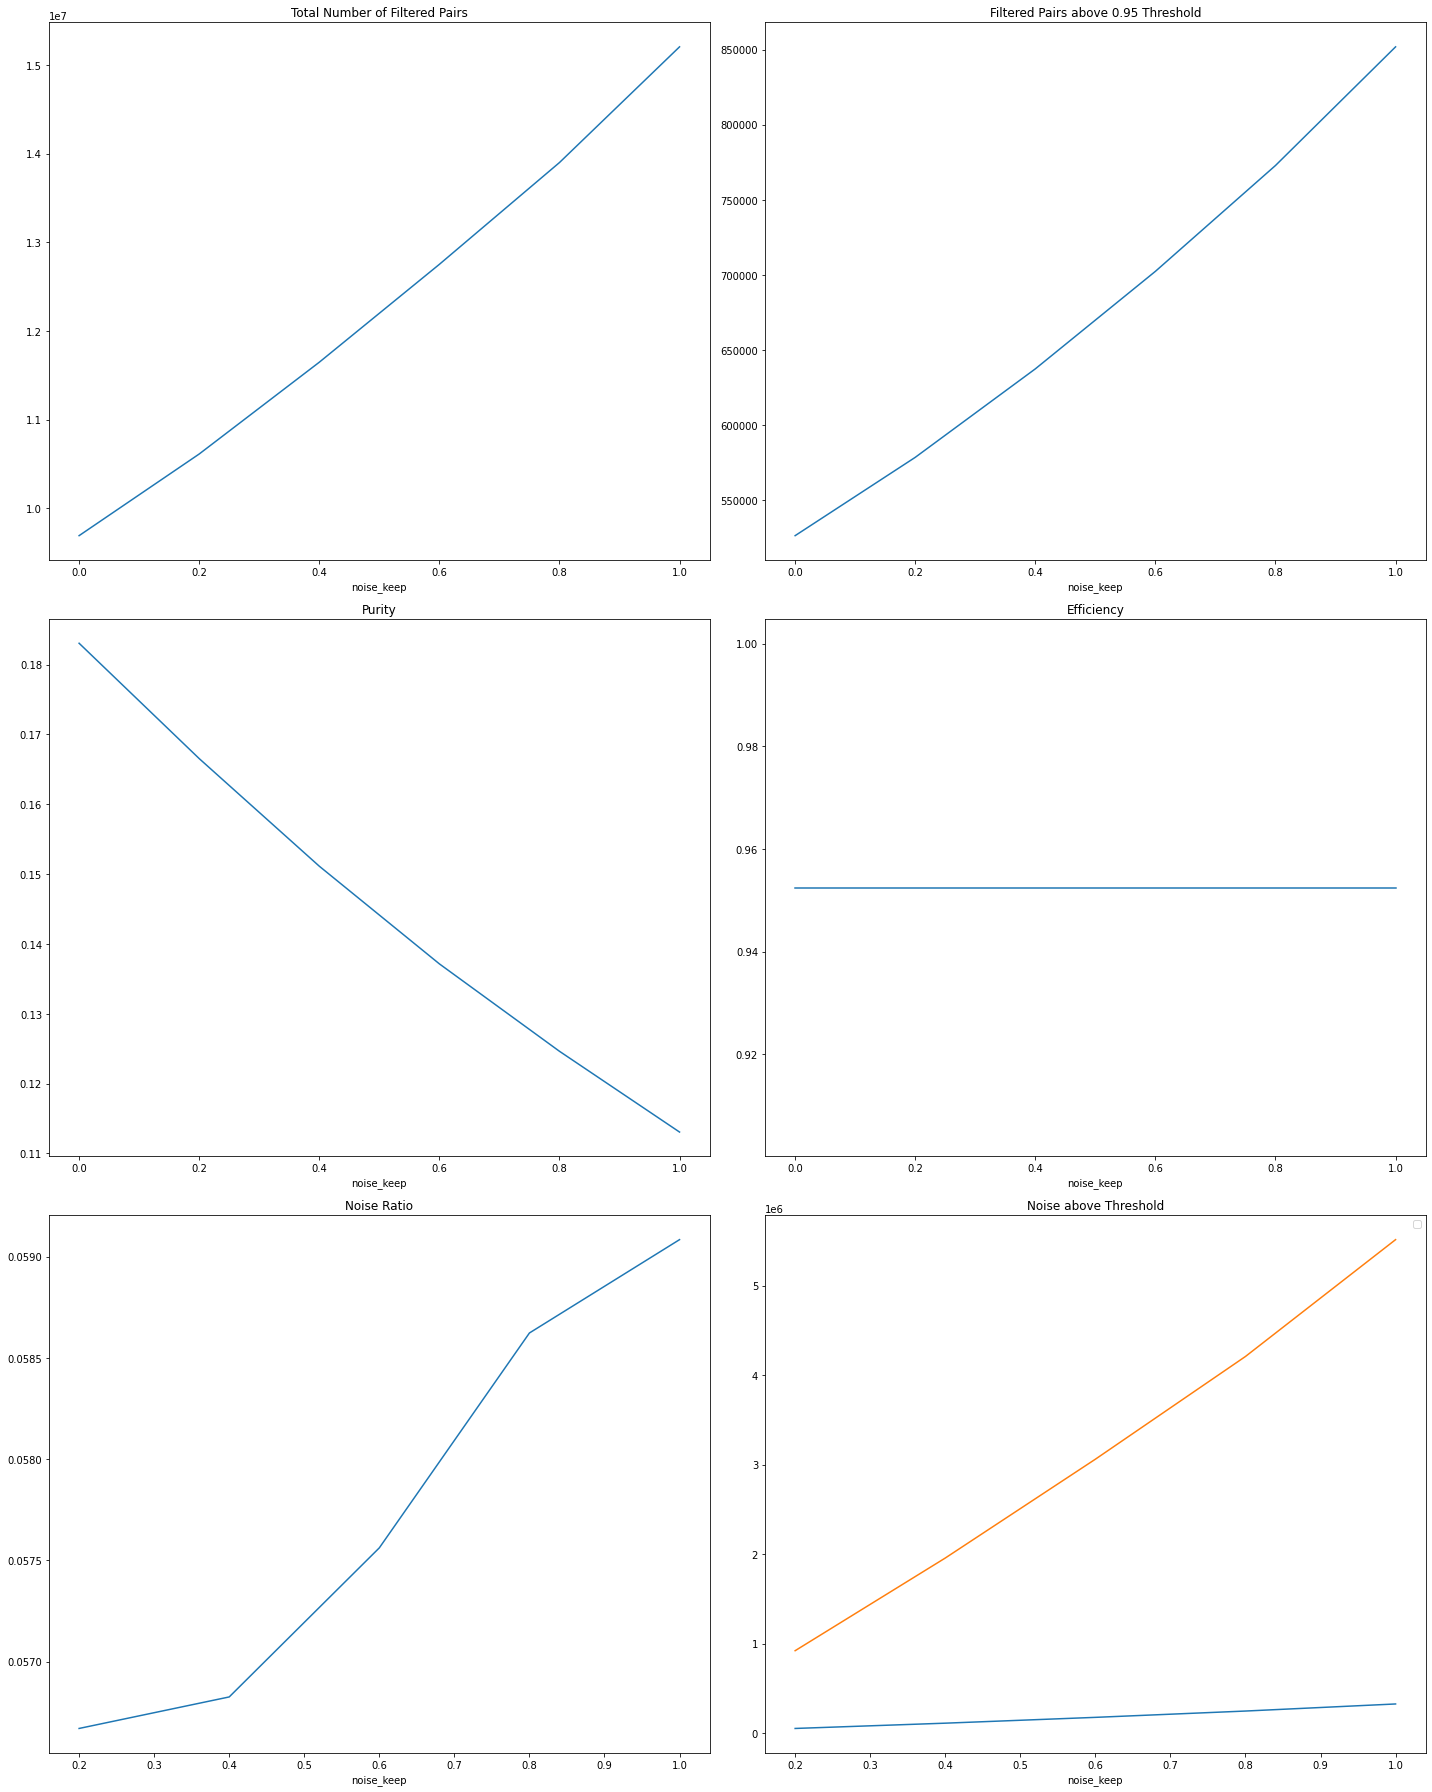

In [4]:
get_filter_metrics(noise_keeps,feature_names)